# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [101]:
import os
import json
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

from HMM import unsupervised_HMM
from wordcloud import WordCloud
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    obs_map_reverser,
    mask
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

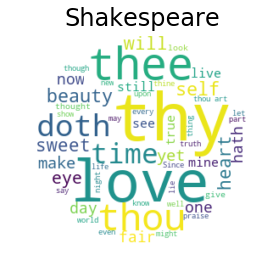

In [102]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

## Training an HMM

Now we train an HMM on our dataset. We use 8 hidden states and train over 1000 iterations:

In [103]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 8, len(obs_map), 1000)

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

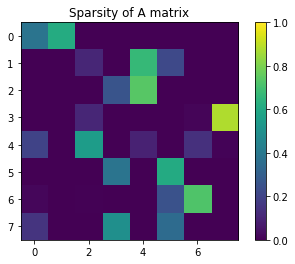

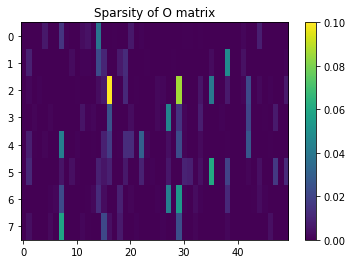

In [104]:
visualize_sparsities(hmm8, O_max_cols=50)

## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

['half', 'as', 'painter', 'weary', 'succession', 'fixed', 'answer', 'self-killed', 'mind', 'nature']
[496, 14, 625, 244, 96, 588, 83, 211, 329, 160]


['within', 'hours', "consum'st", 'tattered', 'as', 'deep', 'violet', 'shall', 'although', 'child']
[38, 167, 291, 69, 14, 57, 372, 53, 891, 86]


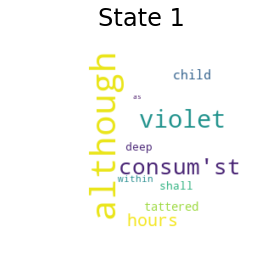

['riper', "world's", 'deep', 'to', 'is', 'buriest', 'through', "widow's", "heaven's", 'answer']
[16, 29, 57, 35, 102, 42, 124, 290, 589, 83]


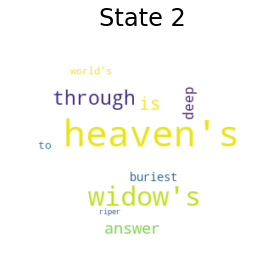

['art', 'sullied', 'riper', 'buriest', "world's", 'hour', 'frank', 'way', 'through', 'beguile']
[27, 466, 16, 42, 29, 834, 147, 257, 124, 110]


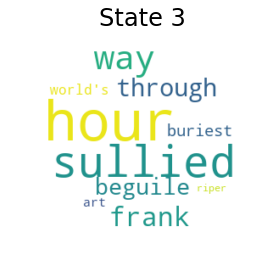

['thereby', 'if', 'tender', 'more', 'buriest', "world's", 'is', 'glass', 'dost', 'true']
[7, 81, 22, 77, 42, 29, 102, 98, 109, 504]


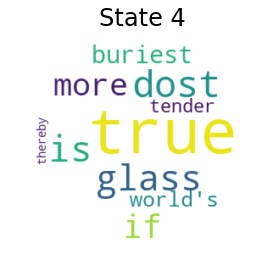

['loveliness', 'to', 'tattered', 'within', 'nature', 'an', "heaven's", 'waste', 'golden', 'dost']
[134, 35, 69, 38, 160, 300, 589, 47, 132, 109]


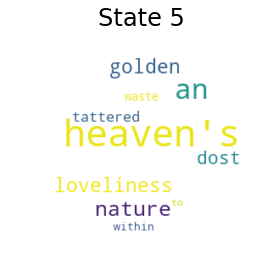

['deep', "world's", 'art', 'true', 'succession', 'tattered', 'thereby', 'nature', 'hours', 'mind']
[57, 29, 27, 504, 96, 69, 7, 160, 167, 329]


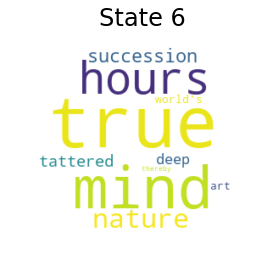

['is', 'deep', 'thereby', 'with', 'worth', 'tattered', "world's", 'the', 'more', 'self-killed']
[102, 57, 7, 155, 73, 69, 29, 15, 77, 211]


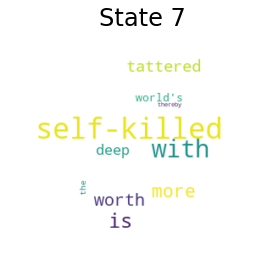

In [105]:
with open('out_q_w_map.json' , 'r') as qr: 
    qrd = qr.read()
    quatrainWordMap = json.loads(qrd)
    quatrainIntMap = dict((int(v),k) for (k,v) in quatrainWordMap.items())
wordclouds = []
    
for state in range(8):
    #print('List of top 10 words and their corresponding integer assignments and probabilities')
    #print('for Hidden state ' + str(state))
    maxprobwords = ['' for i in range(10)]
    maxprobints = [0. for i in range(10)]
    maxprobs = [0. for i in range(10)]
    maxprobwords[0] = str(quatrainIntMap[np.argmax(hmm8.O[state])])
    maxprobints[0] = np.argmax(hmm8.O[state])
    maxprobs[0] = hmm8.O[state][maxprobints[0]]
    for z in range(9):
        maxprobwords[z+1] = hmm8.O[state][0]
        maxprobints[z+1] = 0
        maxprobs[z+1] = hmm8.O[state][maxprobints[z+1]]
        for i in range(hmm8.D):
            if hmm8.O[state][i] >= hmm8.O[state][maxprobints[z+1]] \
            and hmm8.O[state][i] < hmm8.O[state][maxprobints[z]]:
                maxprobwords[z+1] = str(quatrainIntMap[i])
                maxprobints[z+1] = i
                maxprobs[z+1] = hmm8.O[state][maxprobints[z+1]]
    print(maxprobwords)
    print(maxprobints)
    sentence = dict((maxprobwords[j], int(maxprobints[j])) for j in range(len(maxprobwords)))
    wordcloud = WordCloud(random_state=0, background_color='white', mask=mask())
    wordclouds.append(wordcloud.generate_from_frequencies(sentence))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('State %d' %state, fontsize=24)
    plt.show()


In [100]:
    n_states = 8
    lim = 1200
    text_x_offset = 40
    text_y_offset = 80
    x_offset = 580
    y_offset = 520
    R = 420
    r = 100
    arrow_size = 20
    arrow_p1 = 0.03
    arrow_p2 = 0.02
    arrow_p3 = 0.06
    delay = 1
    
    fig, ax = plt.subplots()
    fig.set_figheight(12)
    fig.set_figwidth(12)
    ax.grid('off')
    plt.axis('off')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])
    
    for i, wordcloud in enumerate(wordclouds):
        x = x_offset + int(R * np.cos(np.pi * 2 * i / n_states))
        y = y_offset + int(R * np.sin(np.pi * 2 * i / n_states))
        ax.imshow(wordcloud.to_array(), extent=(x - r, x + r, y - r, y + r), aspect='auto', zorder=-1)

    # Initialize text.
    text = ax.text(text_x_offset, lim - text_y_offset, '', fontsize=24)
        
    # Make the arrows.
    zorder_mult = n_states ** 2 * 100
    arrows = []
    for i in range(n_states):
        row = []
        for j in range(n_states):
            # Arrow coordinates.
            x_i = x_offset + R * np.cos(np.pi * 2 * i / n_states)
            y_i = y_offset + R * np.sin(np.pi * 2 * i / n_states)
            x_j = x_offset + R * np.cos(np.pi * 2 * j / n_states)
            y_j = y_offset + R * np.sin(np.pi * 2 * j / n_states)
            
            dx = x_j - x_i
            dy = y_j - y_i
            d = np.sqrt(dx**2 + dy**2)

            if i != j:
                arrow = ax.arrow(x_i + (r/d + arrow_p1) * dx + arrow_p2 * dy,
                                 y_i + (r/d + arrow_p1) * dy + arrow_p2 * dx,
                                 (1 - 2 * r/d - arrow_p3) * dx,
                                 (1 - 2 * r/d - arrow_p3) * dy,
                                 color=(1 - hmm8.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm8.A[i][j] * zorder_mult))
            else:
                arrow = ax.arrow(x_i, y_i, 0, 0,
                                 color=(1 - hmm8.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm8.A[i][j] * zorder_mult))

            row.append(arrow)
        arrows.append(row)
    
    emission = []
    states = []
    pickState = np.random.choice(len(hmm8.A), 1)
        
    for i in range(8):
        totState = sum(hmm8.A[pickState[0]])
        totEmi = sum(hmm8.O[pickState[0]])
        pickState = np.random.choice(len(hmm8.A), 1, p=np.divide(hmm8.A[pickState[0]], totState))
        pickEmi = np.random.choice(len(hmm8.O[0]), 1, p=np.divide(hmm8.O[pickState[0]], totEmi))
        states.append(pickState[0])
        emission.append(pickEmi[0])
        
    def animate(i):
        if i >= delay:
            i -= delay

            if i == 0:
                arrows[states[0]][states[0]].set_color('red')
            elif i == 1:
                arrows[states[0]][states[0]].set_color((1 - hmm8.A[states[0]][states[0]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')
            else:
                arrows[states[i - 2]][states[i - 1]].set_color((1 - hmm8.A[states[i - 2]][states[i - 1]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')

            # Set text.
            text.set_text(' '.join([obs_map_r[e] for e in emission][:i+1]).capitalize())

            return arrows + [text]
        
    print('\nAnimating...')
    anim = FuncAnimation(fig, animate, frames=8+delay, interval=1000)
    HTML(anim.to_html5_video())


Animating...
